In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

In [45]:
df = pd.read_csv("mobility-data-4.csv")

In [46]:
n1laps = 6
x1lap = [1.0,0.4,0.4,1.2,1.6,1.6]
y1lap = [0.4,1.0,2.0,2.5,2.0,1.0]

nlaps = 5
nc = n1laps*nlaps+1
xc = np.zeros(nc)
yc = np.zeros(nc)
for i in range(nc):
    xc[i] = x1lap[i%6]
    yc[i] = y1lap[i%6]
qc = np.arange(0,nc)
q = np.linspace(0, nc-1, 5000)
xref = CubicSpline(qc, xc)(q)
yref = CubicSpline(qc, yc)(q)

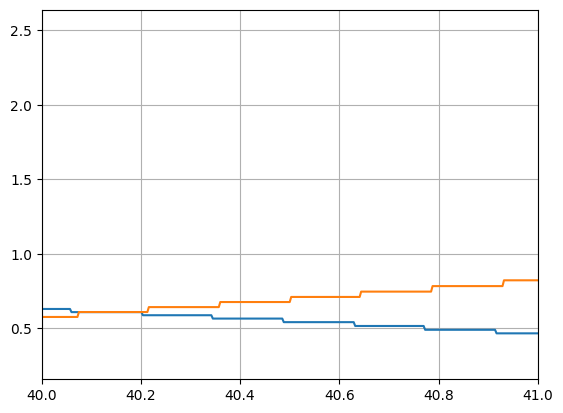

In [41]:
plt.plot(df["time"]/1e6, df["x"])
plt.plot(df["time"]/1e6, df["y"])
# plt.xlim(40,41)
plt.grid()
plt.show()

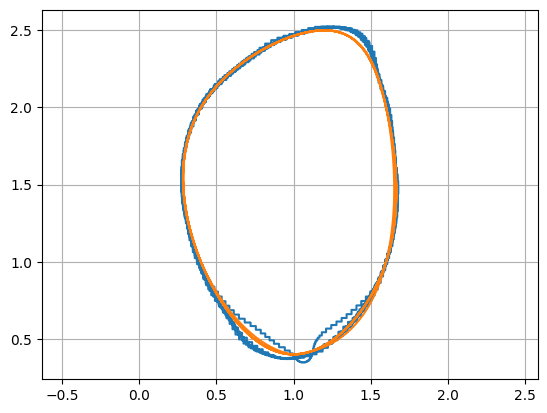

In [37]:
plt.plot(df["x"], df["y"])
plt.plot(xref, yref)
plt.axis("equal")
plt.grid()
plt.show()